<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Aerial-Semantic-Segmentation/blob/main/Aerial_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerial Semantic Segmentation [using RGB masks]

## Objective
To segment the various class of objects in the image.


## Data
The data was obtained from [ICG Drone Dataset](https://www.tugraz.at/index.php?id=22387) and is also available on [Kaggle](https://www.kaggle.com/bulentsiyah/semantic-drone-dataset).  
*  The Data includes several images of city taken using drones (bird's eye view).  
*  It provides both RGB and class_labeled masks for the input images.  
*  In this project we will use RGB images to practice converting them to a format that can be fed to model for segmentation.  

## Imports

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, re
from tqdm import tqdm
from skimage.io import imread
import pandas as pd

In [23]:
# ! unzip "/content/drive/MyDrive/Aerial_Semantic_Segmentation/data/archive.zip" -d "/content/drive/MyDrive/Aerial_Semantic_Segmentation/data/"

## Define paths and visualize

In [24]:
image_path = "/content/drive/MyDrive/Aerial_Semantic_Segmentation/data/dataset/semantic_drone_dataset/original_images/"
label_path = "/content/drive/MyDrive/Aerial_Semantic_Segmentation/data/dataset/semantic_drone_dataset/label_images_semantic/"
rgb_label_path = "/content/drive/MyDrive/Aerial_Semantic_Segmentation/data/RGB_color_image_masks/RGB_color_image_masks/"

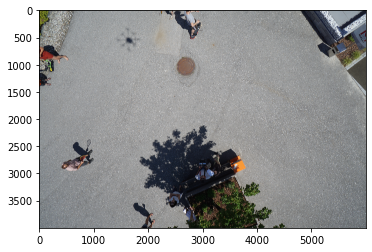

In [25]:
plt.imshow(plt.imread(image_path+'000.jpg'))

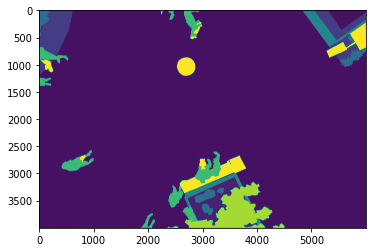

In [26]:
plt.imshow(plt.imread(label_path+'000.png'))

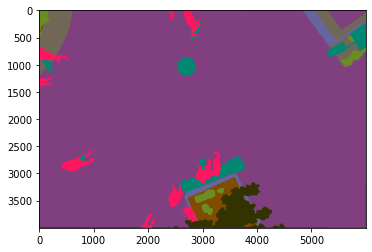

In [27]:
plt.imshow(plt.imread(rgb_label_path+'000.png'))

## Load RGB masks and process them

In [28]:
image_ids = os.listdir(image_path)
rgb_label_ids = os.listdir(label_path)

In [29]:
color_to_object = pd.read_csv('/content/drive/MyDrive/Aerial_Semantic_Segmentation/data/class_dict_seg.csv',index_col=False,skipinitialspace=True)


In [30]:
color_to_object.head()

,name,r,g,b
0,unlabeled,0,0,0
1,paved-area,128,64,128
2,dirt,130,76,0
3,grass,0,102,0
4,gravel,112,103,87


In [31]:
X = []

## Problem: Very large images so the colab ram runs out

In [ ]:
for id in tqdm(image_ids):
  img = imread(image_path + id)
  img = np.array(img)
  X.append(img)
# X = np.array(X)

In [ ]:
X = np.array(X)

In [ ]:
len(image_ids), len(X)

In [33]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]


In [ ]:
def get_segmantation_images(path,new_path, num_images = 10):
    filenames = []
     
    for root, dirnames, filenames in os.walk(path):
        filenames.sort(key = natural_keys)
        rootpath = root

    #print(filenames)
    count = 0
    for item in filenames:
        
        if debug_test_num !=0:
            if debug_test_num <= count:
                break
                
        count = count + 1
        
        if os.path.isfile(path+item):
            f, e = os.path.splitext(item)
            image_rgb = Image.open(path+item)
            image_rgb = np.asarray(image_rgb)
            new_image = np.zeros((image_rgb.shape[0],image_rgb.shape[1],3)).astype('int')

            for index, row  in read_csv.iterrows():
                new_image[(image_rgb[:,:,0]==row.r)&
                          (image_rgb[:,:,1]==row.g)&
                          (image_rgb[:,:,2]==row.b)]=np.array([index+1,index+1,index+1]).reshape(1,3)

            new_image = new_image[:,:,0]
            output_filename = new_path+f+'.png'
            cv2.imwrite(output_filename,new_image)
            print('writing file: ',output_filename)
            
        else:
            print('no file')
        
    print("number of files written: ",count)
    

In [35]:
next(os.walk(rgb_label_path))

('/content/drive/MyDrive/Aerial_Semantic_Segmentation/data/RGB_color_image_masks/RGB_color_image_masks/',
 [],
 ['000.png',
  '001.png',
  '002.png',
  '003.png',
  '004.png',
  '005.png',
  '006.png',
  '008.png',
  '011.png',
  '013.png',
  '014.png',
  '015.png',
  '016.png',
  '018.png',
  '019.png',
  '021.png',
  '022.png',
  '023.png',
  '026.png',
  '028.png',
  '031.png',
  '035.png',
  '038.png',
  '040.png',
  '041.png',
  '042.png',
  '043.png',
  '044.png',
  '045.png',
  '047.png',
  '049.png',
  '051.png',
  '052.png',
  '053.png',
  '055.png',
  '056.png',
  '057.png',
  '058.png',
  '059.png',
  '060.png',
  '062.png',
  '063.png',
  '065.png',
  '068.png',
  '070.png',
  '071.png',
  '073.png',
  '074.png',
  '075.png',
  '077.png',
  '078.png',
  '079.png',
  '080.png',
  '081.png',
  '083.png',
  '086.png',
  '088.png',
  '089.png',
  '092.png',
  '095.png',
  '098.png',
  '099.png',
  '100.png',
  '101.png',
  '102.png',
  '103.png',
  '104.png',
  '106.png',
  '10

In [38]:
for root, dirnames, filenames in os.walk(rgb_label_path):
        filenames.sort(key = natural_keys)
        rootpath = root


In [39]:
filenames

['000.png',
 '001.png',
 '002.png',
 '003.png',
 '004.png',
 '005.png',
 '006.png',
 '008.png',
 '011.png',
 '013.png',
 '014.png',
 '015.png',
 '016.png',
 '018.png',
 '019.png',
 '021.png',
 '022.png',
 '023.png',
 '026.png',
 '028.png',
 '031.png',
 '035.png',
 '038.png',
 '040.png',
 '041.png',
 '042.png',
 '043.png',
 '044.png',
 '045.png',
 '047.png',
 '049.png',
 '051.png',
 '052.png',
 '053.png',
 '055.png',
 '056.png',
 '057.png',
 '058.png',
 '059.png',
 '060.png',
 '062.png',
 '063.png',
 '065.png',
 '068.png',
 '070.png',
 '071.png',
 '073.png',
 '074.png',
 '075.png',
 '077.png',
 '078.png',
 '079.png',
 '080.png',
 '081.png',
 '083.png',
 '086.png',
 '088.png',
 '089.png',
 '092.png',
 '095.png',
 '098.png',
 '099.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '106.png',
 '107.png',
 '109.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '12